<a href="https://colab.research.google.com/github/IOlivaresPalma/Multimedia-Trabajos/blob/main/Actividad_3_OlivaresIvan_197615435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Iván Olivares Palma</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos meustra una onda senoidal.


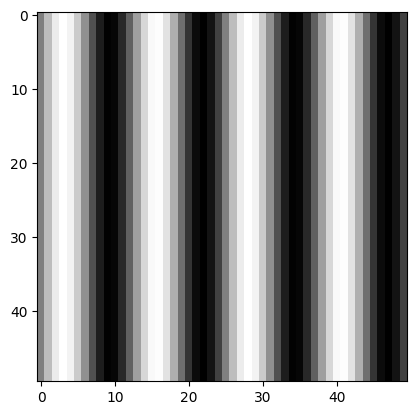

In [82]:
import numpy as np
import matplotlib.pyplot as plt

#generar función bidimensional
x = np.arange(-1,1,0.04)
# Realizar mapeo con vector x para generar matriz
X,Y = np.meshgrid(x,x)

f = 2  #frecuencia
f_bidm = 1*np.sin(1*2*np.pi*X*f)

plt.set_cmap("gray")
plt.imshow(f_bidm)



In [59]:
f_bidm.shape

(50, 50)

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


Text(0.5, 1.0, '')

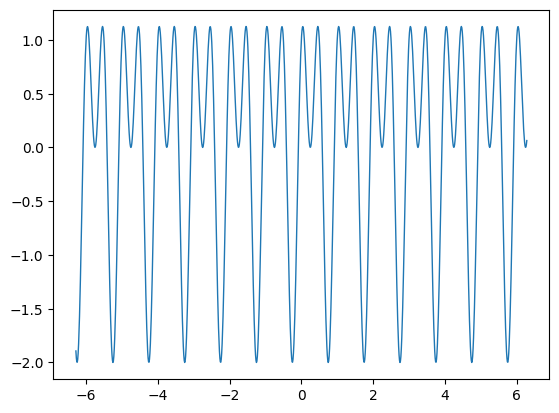

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2*np.pi,2*np.pi,1000)

func = np.sin(2*np.pi*x) + np.cos(2*2*np.pi*x)
(fig,ax) = plt.subplots()

ax.plot(x,func,linewidth=1)
ax.set_title("")


### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

Text(0, 0.5, '$y$')

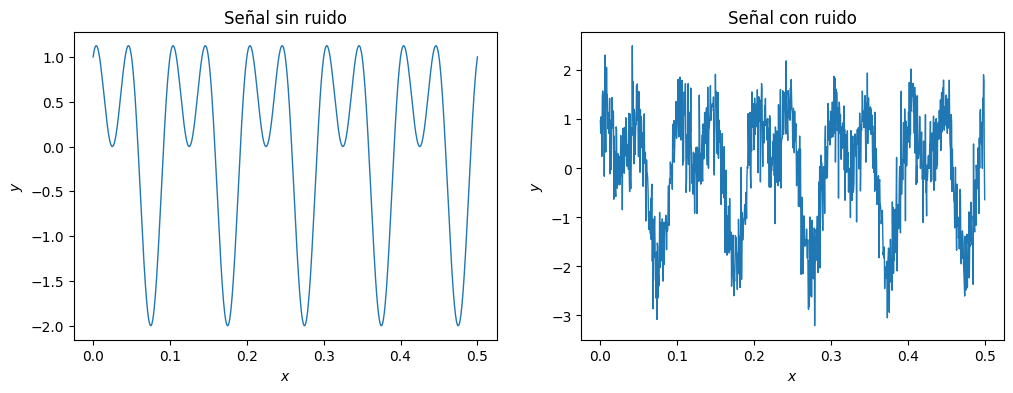

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

x = np.linspace(0,0.5,1000)
f = 10
func = np.sin(2*np.pi*x*f) + np.cos(2*2*np.pi*x*f)

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

ax1.plot(x,func,linewidth=1)
ax1.set_title("Señal sin ruido")
ax1.set_xlabel("$x$")
ax1.set_ylabel("$y$")

# Adicion de ruido

noise = np.random.normal(0,0.5,len(x))
func_noise = func + noise

ax2.plot(x,func_noise,linewidth=1)
ax2.set_title("Señal con ruido")
ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")


## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


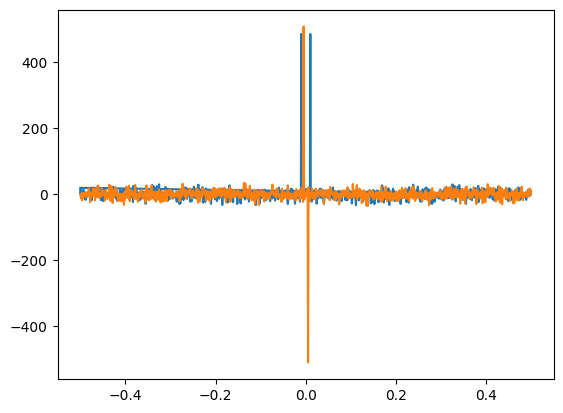

In [73]:
func_fft = np.fft.fft(func_noise)
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(freq, func_fft.real, freq, func_fft.imag)

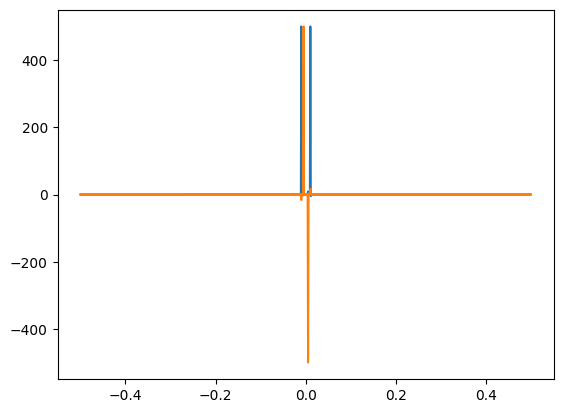

In [76]:
func_fft = np.fft.fft(func)
freq = np.fft.fftfreq(x.shape[-1])
plt.plot(freq, func_fft.real, freq, func_fft.imag)

### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

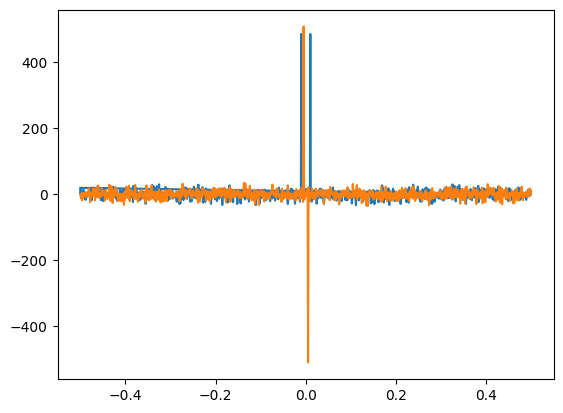

In [74]:
fft_norm = func_fft/np.linalg.norm(func_fft)
plt.plot(freq, func_fft.real, freq, func_fft.imag)


### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


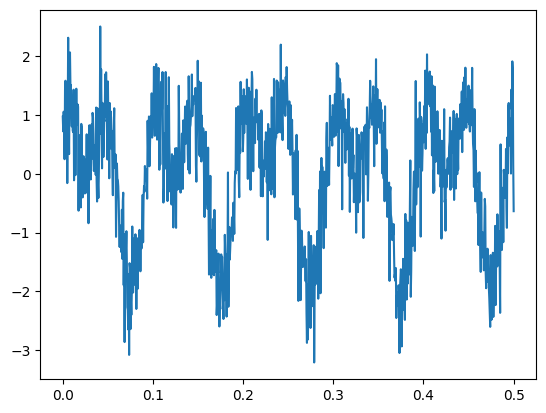

In [75]:
func_ifft = np.fft.ifft(func_fft)
plt.plot(x,func_ifft)

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

"""
Se prueba una función extraida de las referencias, esta función tiene problemas
de tiempo al momento de aumentar el tamaño de la imagen, por lo tanto, se opta
por otra alternativa
"""

def DFT_referencias(imagen):
    M,N = np.shape(imagen)
    dft2d = np.zeros((M,N),dtype=complex)
    for k in range(M):
        for l in range(N):
            sum_matrix = 0.0
            for m in range(M):
                for n in range(N):
                    e = np.exp(- 2j * np.pi * (float(k * m) / M + float(l * n) / N))
                    sum_matrix +=  imagen[m,n] * e
            dft2d[k,l] = sum_matrix
    return dft2d


In [78]:
# Calculo de DFT mediante el uso de matrices

"""
la función se encarga de obtener la DFT utilizando matrices calculadas con la
función Matrices, la cual toma el tamaño de la imagen y genera 2 matrices que
representan las posiciones de cada pixel de la imagen

Al trabajar con matrices se disminuye el uso de más ciclos for
"""
def Mi_DFT2D(imagen):
  M,N = np.shape(imagen)
  pos1,pos2 = Matrices(M,N)
  dft2d = np.zeros((M,N),dtype=complex)
  for k in range(M):
    for l in range(N):
      e = imagen * np.exp(- 2j * np.pi * (((k/M)*pos1)+((l/N)*pos2)))
      dft2d[k,l] = np.sum(e)
  return dft2d

In [79]:
import numpy as np
# funcion para obtener matrices de posiciones

def Matrices(filas,columnas):
  """
  #Parametros de entrada:

  filas: Numero de filas
  columnas: Numero de columnas
  """
  # matriz de posiciones

  matriz1 = np.zeros((filas,columnas),dtype='float')
  matriz2 = np.zeros((filas,columnas),dtype='float')
  for n in range(filas):
    matriz1[n,:] = n
  for m in range(columnas):
    matriz2[:,m] = m

  return matriz1,matriz2

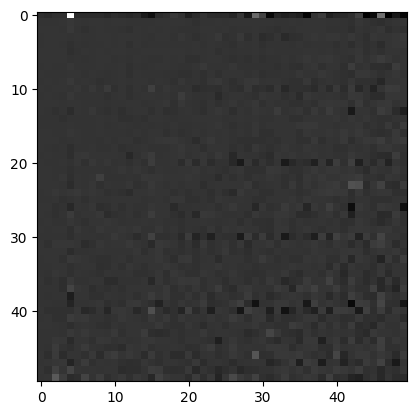

In [67]:

dft2d = DFT_referencias(f_bidm)
plt.imshow(dft2d.real, cmap='gray')
plt.show()

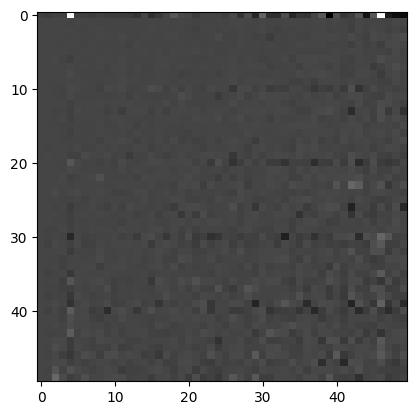

In [83]:
dft2d = Mi_DFT2D(f_bidm)
plt.imshow(dft2d.real, cmap='gray')
plt.show()

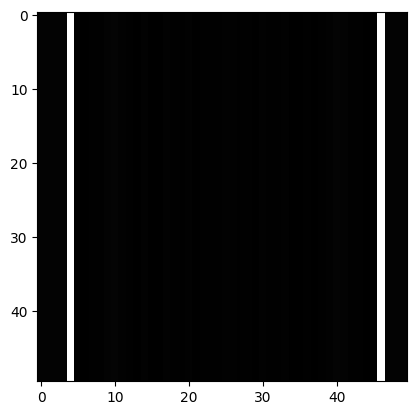

In [84]:
dft = np.fft.fft(f_bidm)
plt.imshow(dft.real, cmap='gray')
plt.show()

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

- Al calcular la fft de la señal sin ruido, la energía solo se acumula en ciertos puntos. Al momento de aplicar ruido a la señal, su transformada de fourier muestra energía en todo el espectro de frecuencias.

- Las transformadas de fourier calculadas representan donde se encuentran las frecuencias primordiales en el espacio bidimensional de una imagen

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html

[Transformada discreta de fourier 2D][https://github.com/Masoud-mk/2D-DFT/blob/master/Project%20(%202D%20DFT%20).ipynb](https://github.com/Masoud-mk/2D-DFT/blob/master/Project%20(%202D%20DFT%20).ipynb)